## <font color = FF66B2> Business Understanding </font>

Data set ini berisi cara untuk memprediksi pasien yang terdampak penyakit Anemia, yang di butuhkan oleh Rumah sakit Dan Klinik,
yang dapat mempermudah tenaga medis untuk memprediksi pasien yang terdampak anemia atau tidak.


## Tentukan library yang akan digunakan

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 

## <font color = FF66B2> Data Understanding </font>
Data set ini memiliki 5 atribut, diantaranya sebagai berikut :
- Gender
- Homoglobin
- MCH
- MCHC
- MCV

## <font color = FF66B2> Data Preparation </font>

In [19]:
anemia_data = pd.read_csv('anemia.csv')

In [20]:
anemia_data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


<Axes: >

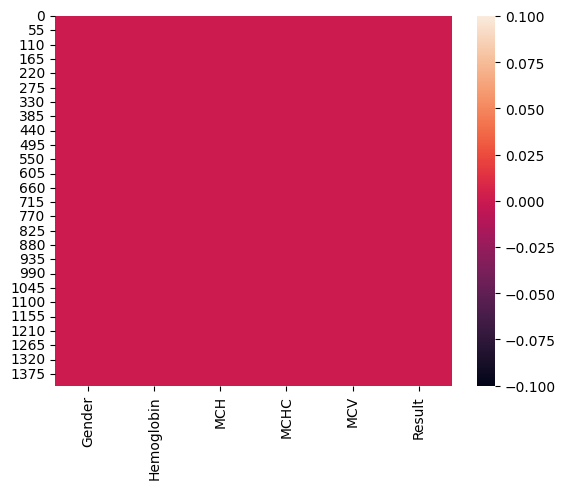

In [21]:
sns.heatmap(anemia_data.isnull())

<Axes: >

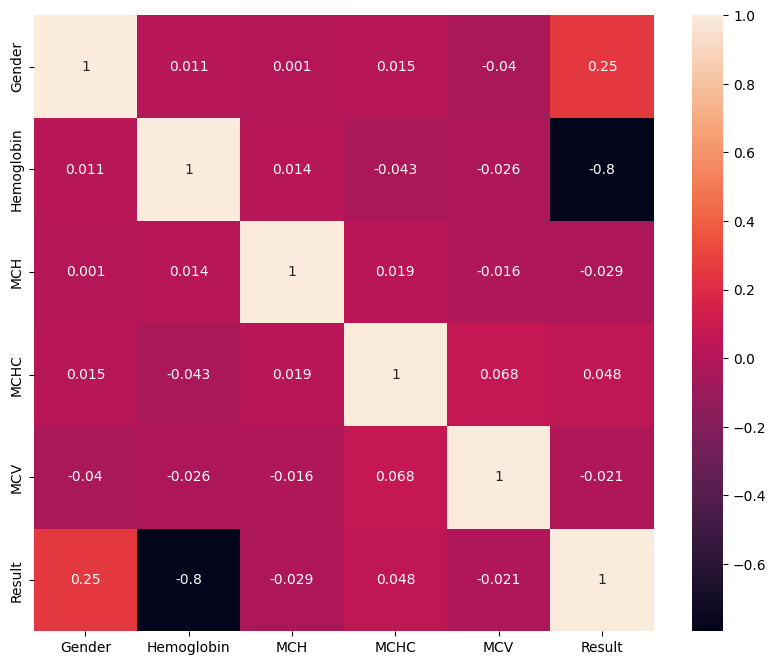

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(anemia_data.corr(),annot=True)

## <font color = FF66B2> Modeling Data </font>

## Pisahkan data atribut dengan label

In [ ]:
X = anemia_data.drop(columns='Result', axis=1)
Y = anemia_data['Result']

In [ ]:
print(X)

      Gender  Hemoglobin   MCH  MCHC   MCV
0          1        14.9  22.7  29.1  83.7
1          0        15.9  25.4  28.3  72.0
2          0         9.0  21.5  29.6  71.2
3          0        14.9  16.0  31.4  87.5
4          1        14.7  22.0  28.2  99.5
...      ...         ...   ...   ...   ...
1416       0        10.6  25.4  28.2  82.9
1417       1        12.1  28.3  30.4  86.9
1418       1        13.1  17.7  28.1  80.7
1419       0        14.3  16.2  29.5  95.2
1420       0        11.8  21.2  28.4  98.1

[1421 rows x 5 columns]


In [ ]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64


## <font color = FF66B2> Modeling </font>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state= 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1421, 5) (1136, 5) (285, 5)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

## <font color = FF66B2> Evaluasi model </font>

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction, Y_train)

In [ ]:
print('Akurasi Data Training :', training_data_accuracy)

Akurasi Data Training : 0.9911971830985915


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Akurasi Data Testing :', test_data_accuracy)

Akurasi Data Testing : 0.9824561403508771


## Buatkan model data prediksi

In [ ]:
input_data = (1, 14.9, 22.7, 29.1, 83.7)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Pasien Tidak Mengidap Penyakit Anemia')
else :
    print('Pasien Mengidap Penyakit Anemia')
    

[0]
Pasien Tidak Mengidap Penyakit Anemia


c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (0,9,21.5,29.6,71.2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Pasien Tidak Mengidap Penyakit Anemia')
else :
    print('Pasien Mengidap Penyakit Anemia')

[1]
Pasien Mengidap Penyakit Anemia


c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## <font color = FF66B2> Deployment </font>

## Simpan model

In [ ]:
import pickle

In [ ]:
filename = 'penyakit_anemia.sav'
pickle.dump(model, open(filename, 'wb'))

# Streamlit
https://andrians11-streamlit-anemia-stream-anemia-q0osfa.streamlit.app/